### ControlNet Demo

This demo is based on huggingface controlnet [demo](https://huggingface.co/blog/controlnet)

In [2]:
!pip install diffusers==0.14.0 transformers xformers git+https://github.com/huggingface/accelerate.git
!pip install opencv-contrib-python controlnet_aux
!pip install triton

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Cloning https://github.com/huggingface/accelerate.git to /tmp/pip-req-build-rl3_zc0t
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/accelerate.git /tmp/pip-req-build-rl3_zc0t
  Resolved https://github.com/huggingface/accelerate.git to commit abc2beb42390afb6ea7185a59cc6fae4610f39cd
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [1]:
import sys
print(sys.version)

3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]


**Note** 

If you encoutered an error like:

`symbol cublasLtGetStatusString version libcublasLt.so.11 not defined in file libcublasLt.so.11 with link time reference`

set the library path before running jupyter notebook.

`
export LD_LIBRARY_PATH=/home/rowel/anaconda3/envs/diffusion/lib/python3.10/site-packages/nvidia/cublas/lib
`

Reason: Incompatibilities with built-in cuda library.

In [2]:
import diffusers

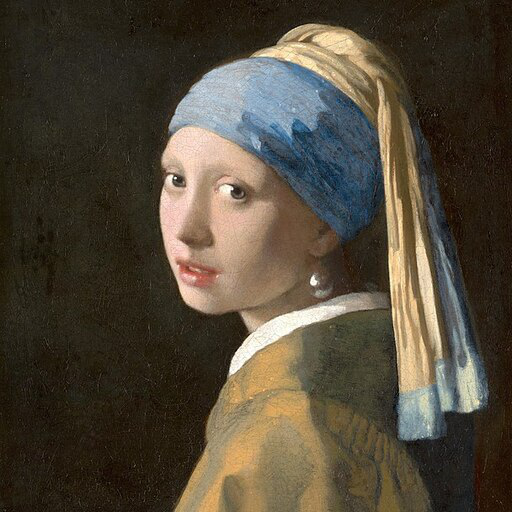

In [4]:
from diffusers.utils import load_image

#image = load_image(
#    "https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png"
#)
image = load_image("input_image_vermeer.png")
image


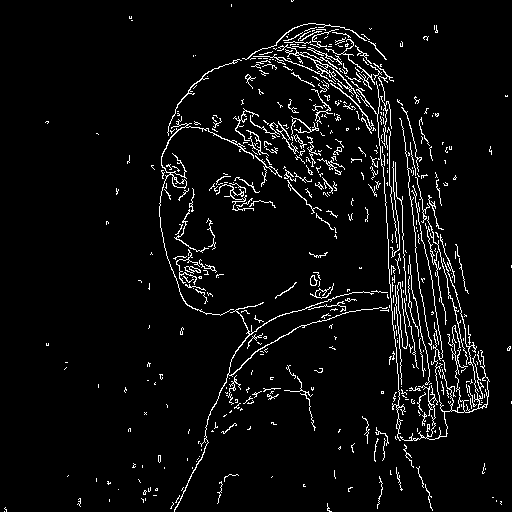

In [5]:
import cv2
from PIL import Image
import numpy as np

image = np.array(image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
canny_image


In [ ]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16
)
